This data set is from Kaggle: https://www.kaggle.com/. 
The data set contains the nutritional information for a variety of foods and this code will be used to analyse and extract informaton about the foods for specific nutritional requirements (conclusions can only be made on the foods that are contained in this dataset)

Import the data set:

In [67]:
import pandas as pd
nutrition= pd.read_csv('nutrition.csv')

Now to have quick look:

In [68]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


The data set contains the nutritional information for 332 foods, and gives the number of calories, protein content, fiber content, fat content, saturated fat content and carbohydrate content for each, and then these are divided into food groups. 

The data set is not perfect and needs some tidying before we use it in the analysis. The "t" represents trace amounts but for the purpose of this analysis, this will be regarded as = 0.
There is also a t' so this will be changed too.



In [69]:
nutrition = nutrition.replace("t", 0)
nutrition = nutrition.replace("t'", 0)

Print the dataset again to check that this was successful:

In [70]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,0,0,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
328,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
329,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
330,Coffee,1 cup,230,3,0,0,0,0,1,"Drinks,Alcohol, Beverages"


All values that had "t" or "t'" are now 0

The next step is to remove all commas, negative values and letters from the data:

In [71]:
nutrition = nutrition.replace(",","", regex=True)


In [72]:
nutrition['Protein'] = nutrition['Protein'].replace("-1","", regex=True)

In [73]:
nutrition['Fiber'] = nutrition['Fiber'].replace("a","", regex=True)

In [74]:
nutrition['Calories'][91] = (8+44)/2

Check data types:

In [75]:
nutrition.dtypes

Food        object
Measure     object
Grams       object
Calories    object
Protein     object
Fat         object
Sat.Fat     object
Fiber       object
Carbs       object
Category    object
dtype: object

Now to change all following datatypes to numeric:

In [76]:
nutrition['Grams']=pd.to_numeric(nutrition['Grams'])
nutrition['Calories']=pd.to_numeric(nutrition['Calories'])
nutrition['Protein']=pd.to_numeric(nutrition['Protein'])
nutrition['Fat']=pd.to_numeric(nutrition['Fat'])
nutrition['Sat.Fat']=pd.to_numeric(nutrition['Sat.Fat'])
nutrition['Fiber']=pd.to_numeric(nutrition['Fiber'])
nutrition['Carbs']=pd.to_numeric(nutrition['Carbs'])

Check dataypes to check successful:

In [77]:
nutrition.dtypes

Food         object
Measure      object
Grams         int64
Calories    float64
Protein     float64
Fat           int64
Sat.Fat     float64
Fiber       float64
Carbs       float64
Category     object
dtype: object

Correct dataypes, some are decimal (float) and others are intergers (int). Next is checking for any null values in the data before analysing:

In [78]:
print(nutrition.isnull().any())
print('-'*245)
print(nutrition.describe())
print('-'*245)

Food        False
Measure     False
Grams       False
Calories     True
Protein      True
Fat         False
Sat.Fat      True
Fiber        True
Carbs       False
Category    False
dtype: bool
-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
             Grams     Calories     Protein         Fat     Sat.Fat  \
count   332.000000   331.000000  331.000000  332.000000  330.000000   
mean    143.138554   188.842900    7.290030    7.222892    5.084848   
std     139.192748   185.332983    9.886041   13.155761   10.668766   
min      11.000000     0.000000    0.000000    0.000000    0.000000   
25%      60.000000    75.000000    1.000000    0.000000    0.000000   
50%     105.500000   130.000000    3.000000    1.000000    0.000000   
75%     200.000000   250.000000   12.000000   10.000000    7.0000

There is a null value in this row so we shall drop it for this analysis:

In [79]:
nutrition=nutrition.dropna()
nutrition.shape

(327, 10)

Now to change the category names and reduce the number of categories for easier visulaistion:

In [80]:
nutrition['Category']

0               Dairy products
1               Dairy products
2               Dairy products
3               Dairy products
4               Dairy products
                ...           
327    DrinksAlcohol Beverages
328    DrinksAlcohol Beverages
329    DrinksAlcohol Beverages
330    DrinksAlcohol Beverages
331    DrinksAlcohol Beverages
Name: Category, Length: 327, dtype: object

In [81]:
nutrition['Category'] = nutrition['Category'].replace('DrinksAlcohol Beverages', 'Drinks, Alcohol, and Beverages', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Fats Oils Shortenings', 'Fats, Oils, and Shortenings', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Fish Seafood', 'Fish and Seafood', regex=True)
nutrition['Category'] = nutrition['Category'].replace('Meat Poultry', 'Meat and Poultry', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Breads cereals fastfoodgrains', 'Seeds and Nuts'], 'Grains', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Fruits A-F', 'Fruits G-P', 'Fruits R-Z'], 'Fruits', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Vegetables A-E', 'Vegetables F-P', 'Vegetables R-Z'], 'Vegetables', regex=True)
nutrition['Category'] = nutrition['Category'].replace(['Desserts sweets', 'Jams Jellies'], 'Desserts', regex=True)

In [82]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660.0,32.0,40,36.0,0.0,48.0,Dairy products
1,Milk skim,1 qt.,984,360.0,36.0,0,0.0,0.0,52.0,Dairy products
2,Buttermilk,1 cup,246,127.0,9.0,5,4.0,0.0,13.0,Dairy products
3,Evaporated undiluted,1 cup,252,345.0,16.0,20,18.0,0.0,24.0,Dairy products
4,Fortified milk,6 cups,1419,1373.0,89.0,42,23.0,1.4,119.0,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,161.0,0.0,0,0.0,0.0,42.0,"Drinks, Alcohol, and Beverages"
328,Ginger ale,12 oz.,346,105.0,0.0,0,0.0,0.0,28.0,"Drinks, Alcohol, and Beverages"
329,Root beer,12 oz.,346,140.0,0.0,0,0.0,0.0,35.0,"Drinks, Alcohol, and Beverages"
330,Coffee,1 cup,230,3.0,0.0,0,0.0,0.0,1.0,"Drinks, Alcohol, and Beverages"


Before visualisation, we need to make sure that all readings are converted to amount per gram:

In [83]:
nutrition['Calories'] = nutrition['Calories'] / nutrition['Grams']
nutrition['Protein'] = nutrition['Protein'] / nutrition['Grams']
nutrition['Fat'] = nutrition['Fat'] / nutrition['Grams']
nutrition['Sat.Fat'] = nutrition['Sat.Fat'] / nutrition['Grams']
nutrition['Fiber'] = nutrition['Fiber'] / nutrition['Grams']
nutrition['Carbs'] = nutrition['Carbs'] / nutrition['Grams']

In [84]:
nutrition

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,0.676230,0.032787,0.040984,0.036885,0.000000,0.049180,Dairy products
1,Milk skim,1 qt.,984,0.365854,0.036585,0.000000,0.000000,0.000000,0.052846,Dairy products
2,Buttermilk,1 cup,246,0.516260,0.036585,0.020325,0.016260,0.000000,0.052846,Dairy products
3,Evaporated undiluted,1 cup,252,1.369048,0.063492,0.079365,0.071429,0.000000,0.095238,Dairy products
4,Fortified milk,6 cups,1419,0.967583,0.062720,0.029598,0.016209,0.000987,0.083862,Dairy products
...,...,...,...,...,...,...,...,...,...,...
327,Fruit-flavored soda,12 oz.,346,0.465318,0.000000,0.000000,0.000000,0.000000,0.121387,"Drinks, Alcohol, and Beverages"
328,Ginger ale,12 oz.,346,0.303468,0.000000,0.000000,0.000000,0.000000,0.080925,"Drinks, Alcohol, and Beverages"
329,Root beer,12 oz.,346,0.404624,0.000000,0.000000,0.000000,0.000000,0.101156,"Drinks, Alcohol, and Beverages"
330,Coffee,1 cup,230,0.013043,0.000000,0.000000,0.000000,0.000000,0.004348,"Drinks, Alcohol, and Beverages"


**Data Visualisation and Analysis**

Import libraries that are needed for data visualisation:

In [85]:
import matplotlib as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go


Now to look for common desires in food. First, let us look at the foods that have the higest fibre content, using a bar chart:
    

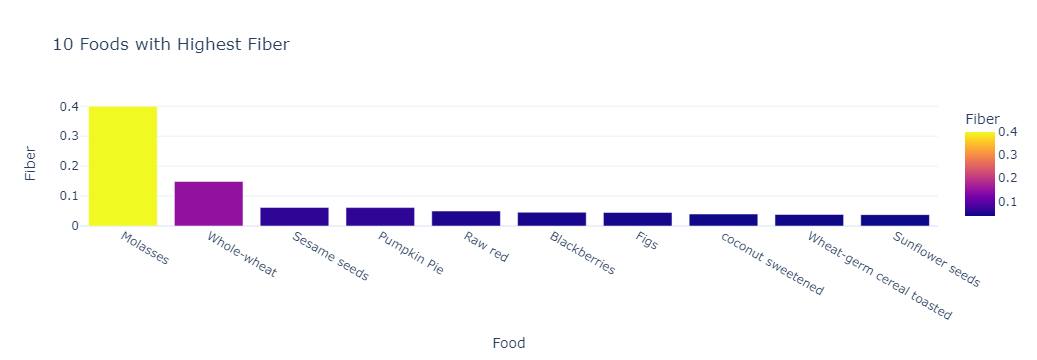

In [99]:
fiber = nutrition.sort_values(by='Fiber', ascending= False)
top_10_fiber = fiber.head(10)
fig = px.bar(top_10_fiber, x='Food', y='Fiber', color='Fiber', title=' 10 Foods with Highest Fiber', template = 'plotly_white')
fig.show()

Now to do the same but for protien:

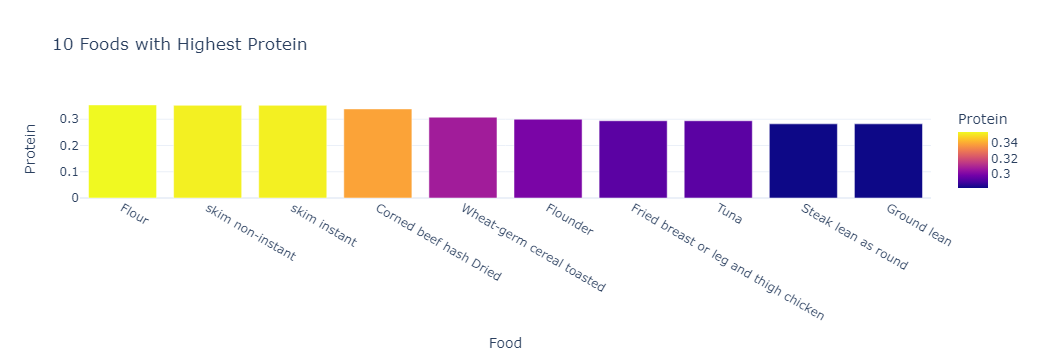

In [98]:
protein = nutrition.sort_values(by='Protein', ascending= False)
top_10_protein = protein.head(10)
fig = px.bar(top_10_protein, x='Food', y='Protein', color='Protein', title=' 10 Foods with Highest Protein', template = 'plotly_white')
fig.show()

Now for Carbohydrates:

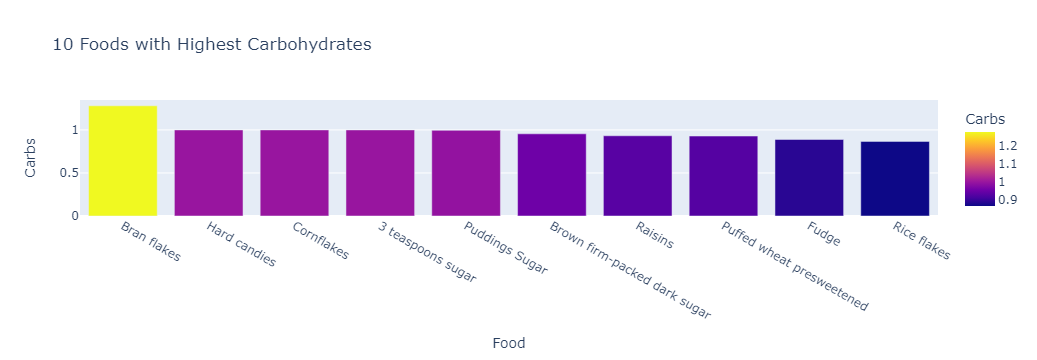

In [97]:
carbs = nutrition.sort_values(by='Carbs', ascending= False)
top_10_carbs = carbs.head(10)
fig = px.bar(top_10_carbs, x='Food', y='Carbs', color='Carbs', title=' 10 Foods with Highest Carbohydrates', template = 'plotly')
fig.show()

Now for Fat:

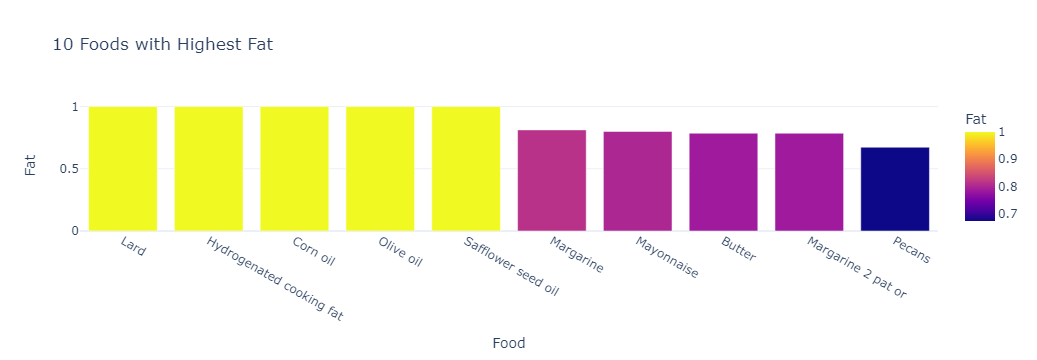

In [95]:
fat = nutrition.sort_values(by='Fat', ascending= False)
top_10_fat = fat.head(10)
fig = px.bar(top_10_fat, x='Food', y='Fat', color='Fat', title=' 10 Foods with Highest Fat', template = 'plotly_white')
fig.show()

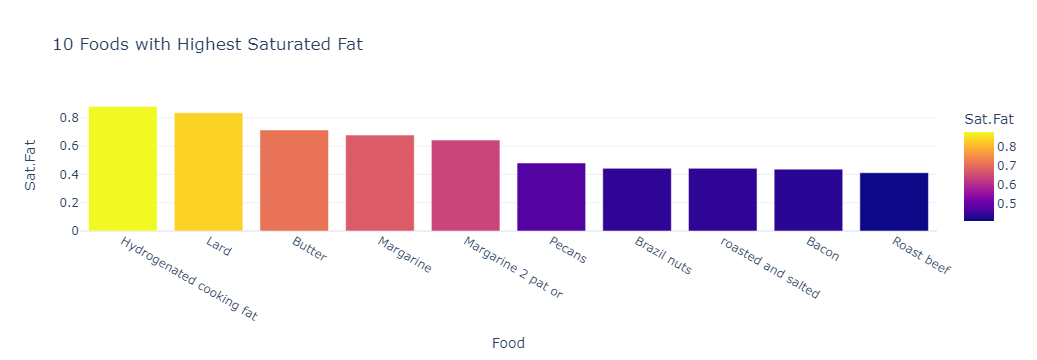

In [96]:
fat = nutrition.sort_values(by='Sat.Fat', ascending= False)
top_10_fat = fat.head(10)
fig = px.bar(top_10_fat, x='Food', y='Sat.Fat', color='Sat.Fat', title=' 10 Foods with Highest Saturated Fat', template = 'plotly_white')
fig.show()

This information is helpful but we may want to know about whole food groups overall:

It may be more helpful to know about whole food groups, and this  information can displayed in the form of a pie chart:

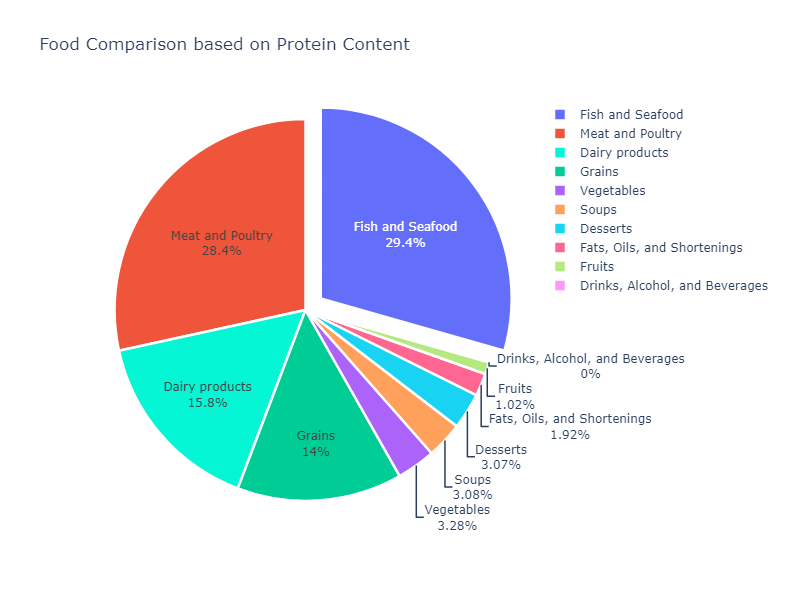

In [91]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Protein'].values, text=category_dist.index, labels=category_dist.index,pull=[0,0,0,0,0.1,0,0,0,0,0],
                marker=dict(colors=['#05f6d5'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Comparison based on Protein Content",height=600, width=800)
fig.show()

Results show that **Fish and Seafood** have the highest, **Meat and Poultry** have the second highest content, and **Dairy Products** are third highest for protein content.

Now to look at fiber content in this format:

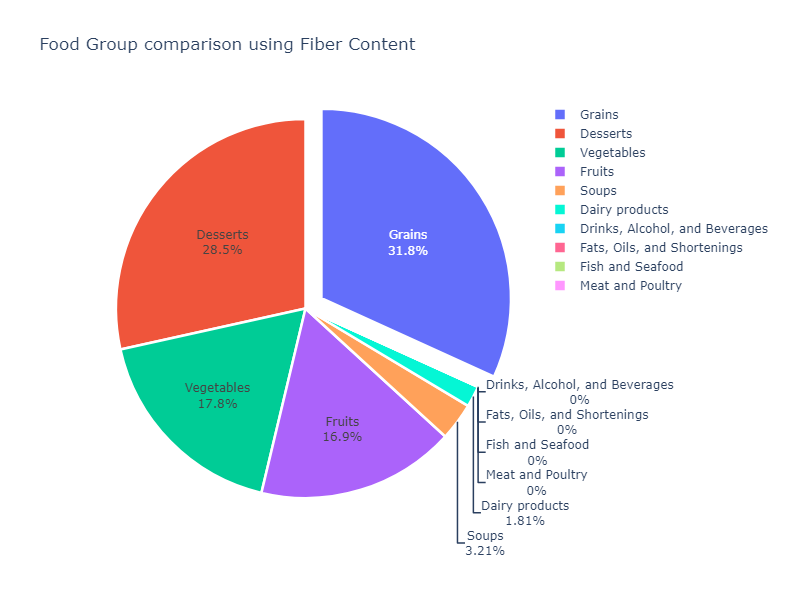

In [92]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Fiber'].values, text=category_dist.index, labels=category_dist.index,pull=[0,0,0,0,0,0,0.1,0,0,0],
                marker=dict(colors=['#05f6d5'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Group comparison using Fiber Content",height=600, width=800)
fig.show()

**Grains** have the highest fiber content 

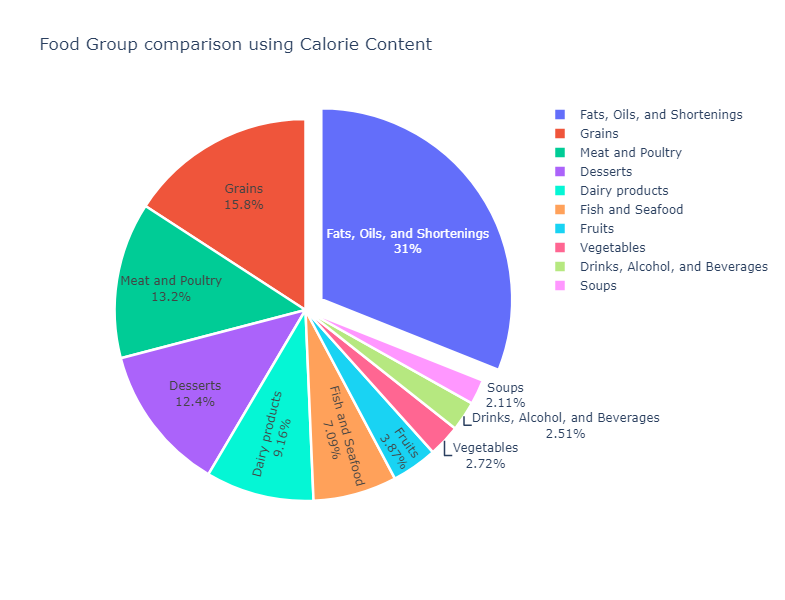

In [93]:
category_dist = nutrition.groupby(['Category']).mean()
category_dist
fig = go.Figure(go.Pie(values=category_dist['Calories'].values, text=category_dist.index, labels=category_dist.index, pull=[0,0,0.,0.1,0,0,0,0,0,0],
                marker=dict(colors=['#05f6d5'], line=dict(color='#FFFFFF', width=2.5))))
fig.update_layout(title_text="Food Group comparison using Calorie Content",height=600, width=800)
fig.show()

**Fats, Oils, and Shortenings** have the highest calorie content, followed by **desserts** and **grains**. 

The results from this data visualisation can be used for educational purposes. This can be used as a tool when learning about what foods provide the most of each major macronutrient and also help with calorie intake awareness. 